# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as stats
import pandas as pd

# Helper Functions

In [2]:
def significantStr(num):
    if num<0.05:
        return "<0.5"
    else:
        return ">0.5"

# Data Import

##  with all the files

In [3]:
loc = "/project/ag-raedler/User/Maximilian.Kreft/CutDrifts/forces/"

In [4]:
boolean = lambda df: df.replace({"True":True, "False":False, "0":False})

In [6]:
pd1 = boolean(pd.read_csv(loc + "20220307_24h_softdumbbells_XY30_mcherry_1tif_shortRange.tif_forces.txt", index_col="frame_index"))
pd2 = boolean(pd.read_csv(loc + "20220307_24h_softdumbbells_XY05_mcherry_1.tif_forces.txt", index_col="frame_index"))
pd3 = boolean(pd.read_csv(loc + "20220307_24h_softdumbbells_XY09_mcherry_1.tif_forces.txt", index_col="frame_index"))
pd4 = boolean(pd.read_csv(loc + "20220307_24h_softdumbbells_XY22_mcherry_1.tif_forces.txt", index_col="frame_index"))
pd5 = boolean(pd.read_csv(loc + "20220211_softdumbbells_XY17_mcherry_Short-1.tif_forces.txt", index_col="frame_index"))
pd6 = boolean(pd.read_csv(loc + "C2-20220114_softdumbbells_XY03_merged-1_eGFP.tif_forces.txt", index_col="frame_index"))
pd7 = boolean(pd.read_csv(loc + "C2-20220603_softdumbbells_XY07_merged-1_eGFp.tif_forces.txt", index_col="frame_index")) # outlier data
pds = [pd1, pd2, pd3, pd4, pd5, pd6, pd7]
middle_ranges = [[180, 240],[180, 240],[160, 250],[190, 260],[180, 250],[180, 250],[160, 240]] # inside the bridge
# same as in PIV this could be automated from the .txt files


In [26]:
t = pd1.append(pds[1:], ignore_index=True)
t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,dy,dx,fx,fy,in_bridge,x_nucleus,y_nucleus
0,110.223724,257.924148,10388.554271,2.050438,0.297139,675.446104,103008.0,0.042943,0,1,0.000000,0.000000,0.000000,0.000000,False,88.115143,77.732608
1,108.947531,198.539162,15263.449743,1.838732,0.269567,1356.513291,110974.0,0.038816,0,2,-0.020280,-0.123621,-0.199447,-0.013252,False,88.115143,77.732608
2,102.420054,246.134577,18096.850797,2.280875,0.221035,1083.203698,126540.0,0.032678,0,4,0.409037,0.680514,2.575993,1.200419,False,88.115143,77.732608
3,100.442433,223.277370,11103.930889,1.888326,0.164916,867.770450,85052.0,0.056482,0,5,-0.045341,-0.050747,-0.052458,-0.044302,False,88.115143,77.732608
4,99.253419,133.905398,7137.194396,1.990549,0.070683,497.903126,70002.0,0.076768,0,9,-0.133231,0.049640,0.050750,-0.223149,False,88.115143,77.732608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103725,35.124695,266.776001,189197.122041,1.517636,0.140053,20407.192491,1753954.0,0.302408,250,132,0.000000,0.000000,0.000000,0.000000,False,38.711683,47.038077
103726,37.408680,163.055990,166558.094914,1.716220,0.076207,14374.385713,1612675.0,0.559480,250,136,0.000000,0.000000,0.000000,0.000000,False,38.711683,47.038077
103727,37.128683,212.218810,101893.725020,1.861354,0.148189,8130.808920,1740129.0,0.316645,250,138,0.000000,0.000000,0.000000,0.000000,False,38.711683,47.038077
103728,37.874145,139.675101,153312.880462,1.603169,0.081498,14805.623750,1664950.0,0.425608,250,141,0.000000,0.000000,0.000000,0.000000,False,38.711683,47.038077


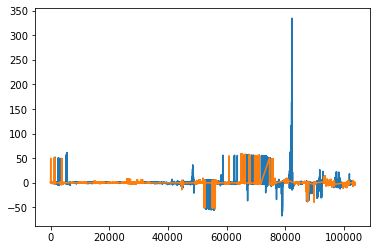

In [8]:
plt.plot(t[t["in_bridge"]==True]["fx"])
plt.plot(t[t["in_bridge"]==0]["fx"])

# dx dy fy fx Calculations

In [9]:
def d_f_plots(d_in, d_out, name, unit):
    # cleaning from extreme outliers
    z_in = np.abs(stats.zscore(d_in))
    z_out = np.abs(stats.zscore(d_out))
    #only keep rows in dataframe with all z-scores less than absolute value of 3 
    d_in_c = d_in[(z_in<3)]
    d_out_c = d_out[(z_out<3)]
    
    fig, ax = plt.subplots()
    ax.boxplot([d_in_c, d_out_c], showfliers=0)
    ax.set_xticklabels([f" inside \n{np.round(d_in_c.mean(),3)}", f" outside \n{np.round(d_out_c.mean(),3)}"])
    statres = stats.mannwhitneyu(d_in_c, d_out_c)
    ax.set_title(f"${name}$ in/out: {np.round(d_in_c.mean() / d_out_c.mean(),1)}  \n p-value:{statres[1]}")
    ax.set_ylabel(f"${name}$ [{unit}]")
    fig.savefig(f"{name}_inside_ouside_barplot.png", dpi=300)
    fig.show()
    print(statres)
    
    plt.show()
    plt.hist([d_in_c, d_out_c], bins=30)

    plt.title(f"${name}$ in/out: {np.round(d_in_c.mean() / d_out_c.mean(),1)}  \n p-value: {significantStr(statres[1])}")
    plt.yscale("log")
    plt.legend(["d_in", "d_out"])
    plt.xlabel(f"${name}$ [{unit}]")
    plt.ylabel("Occurrence")
    plt.savefig(f"{name}_inside_ouside_hist.png", dpi=300)
    plt.show()

## dx check

MannwhitneyuResult(statistic=1402524471.0, pvalue=2.3222783825455243e-142)


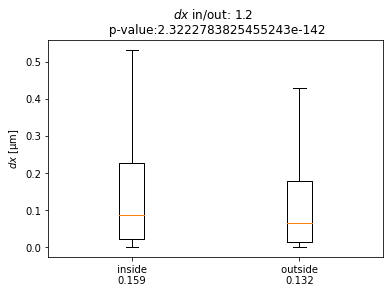

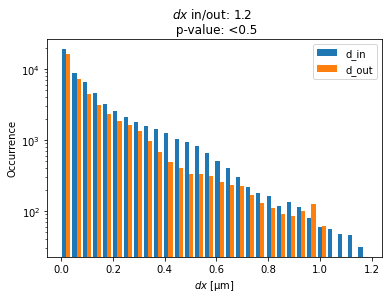

In [10]:
d_in = abs(t[t["in_bridge"]==True]["dx"])
d_out =  abs(t[t["in_bridge"]==False]["dx"])

d_f_plots(d_in, d_out, "dx", "µm")

## dy

MannwhitneyuResult(statistic=1472659670.0, pvalue=0.0)


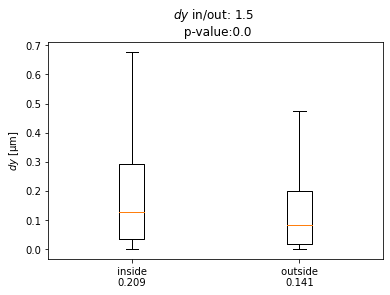

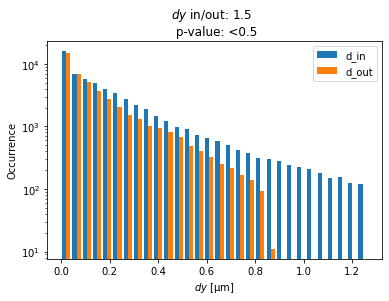

In [11]:
d_in_y = abs(t[t["in_bridge"]==True]["dy"])
d_out_y =  abs(t[t["in_bridge"]==False]["dy"])

d_f_plots(d_in_y, d_out_y, "dy", "µm")

## fy

MannwhitneyuResult(statistic=1491218848.0, pvalue=0.0)


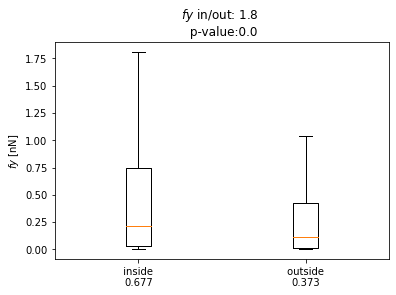

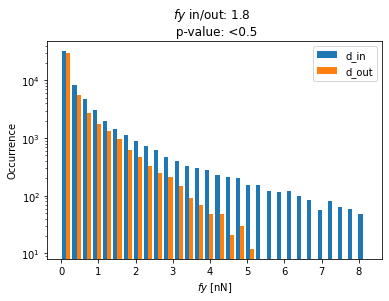

In [12]:
f_in = abs(t[t["in_bridge"]==True]["fy"])
f_out =  abs(t[t["in_bridge"]==False]["fy"])

d_f_plots(f_in, f_out, "fy", "nN")

## fx

MannwhitneyuResult(statistic=1410652981.0, pvalue=7.83170521096188e-111)


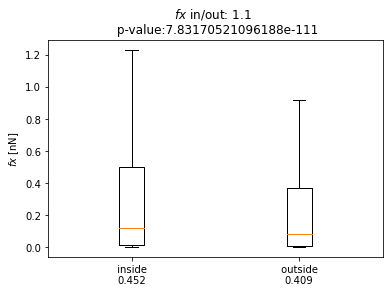

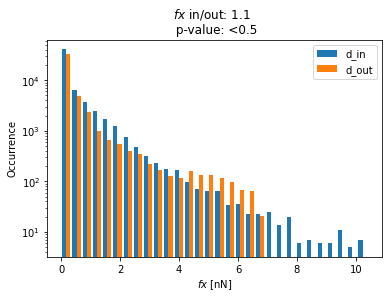

In [13]:
f_in = abs(t[t["in_bridge"]==True]["fx"])
f_out =  abs(t[t["in_bridge"]==False]["fx"])


d_f_plots(f_in, f_out, "fx", "nN")

# frction coefficient

In [14]:
d_in_y = abs(t[t["in_bridge"]==True]["dy"])
d_in_x =  abs(t[t["in_bridge"]==True]["dx"])

div = (d_in_y/d_in_x).values

np.nanmean(div) # ignore the NaNs
#np.nanstd(div)

14.804109199895837

51.22446752668498


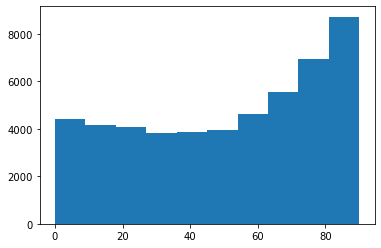

In [15]:
r2d = 360/(2*np.pi) #rad to degree 
plt.hist(np.arctan(div)*r2d)

print(np.nanmean(np.arctan(div))*r2d)

74.60380257896814


15140

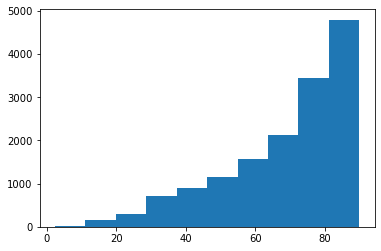

In [16]:
div_middle = (d_in_y[d_in_y>0.3] / d_in_x[d_in_y>0.3]).values
plt.hist(np.arctan(div_middle)*r2d)
print(np.nanmedian(np.arctan(div_middle))*r2d)
len(div_middle)

79.57609100822829
69.8525810495595
79.39400761063551
55.93203216938123
64.1856514412314
67.31130044148055
67.6190818508601
median = 78 std = 17 degrees
0.16441299552546065 -0.5383401158660024 sem: sigma/root n: 0.2393158145623064


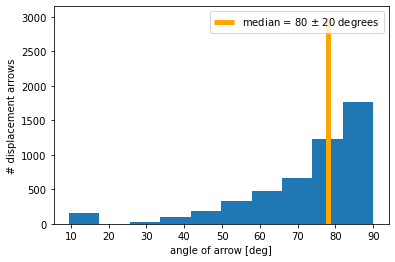

In [17]:
div_results = np.array([])
for i in range(len(pds)):
    pd = pds[i]
    xmin, xmax = middle_ranges[i]
    d_middle_y = abs(pd[(pd["x"]<xmax) & (pd["x"]>xmin)]["dy"])
    d_middle_x = abs(pd[(pd["x"]<xmax) & (pd["x"]>xmin)]["dx"])
    minlen = 0.5
    when_large_disp = (d_middle_y > minlen) | (d_middle_x > minlen)
    when_large_disp_y = (d_middle_y > minlen) 
    div = (d_middle_y[when_large_disp_y]/d_middle_x[when_large_disp_y]).values
    print(np.nanmean(np.arctan(div)*r2d))
    div_results = np.concatenate((div_results, div), axis=None)

plt.hist(np.arctan(div_results)*r2d)
median = np.nanmedian(np.arctan(div_results)*r2d)
std = np.nanstd(np.arctan(div_results)*r2d)
plt.ylabel(f"# displacement arrows")
plt.xlabel(f"angle of arrow [deg]")
plt.vlines(np.nanmedian(np.arctan(div_results)*r2d), ymin=0, ymax=3000, color="orange", linewidth=5, label=f"median = {int(np.round(median, -1))} $\pm$ {int(np.round(std, -1))} degrees")
plt.legend()
plt.savefig("displacement_arrows_angles.png", dpi=400)
print(f"median = {int(np.round(median))} std = {int(np.round(std))} degrees")

alpha, beta = 100/0.69, 100/0.74
mu = (beta/alpha) / np.tan(80*2*np.pi/360)
mu1 = (beta/alpha) / np.tan(90*2*np.pi/360)
mu2 = (beta/alpha) / np.tan(60*2*np.pi/360)
print(mu, mu1-mu2, f"sem: sigma/root n: {std/(np.sum(~np.isnan(div_results)))**0.5}")

In [18]:
alpha, beta = 100/0.69, 100/0.74
mu = (beta/alpha) / np.tan(45*2*np.pi/360)
mu

0.9324324324324325

68.85518905139848
median = 77.39670898864965 std = 21.287581890424228 degrees, sem: 0.32349282610955243
first quant = 59.83429857526376 median= 77.39670898864965 third wuant = 84.22688378478773


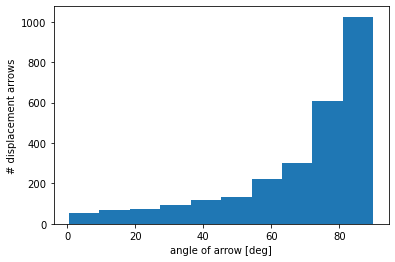

In [19]:
div_results = np.array([])
for i in range(1):
    pd = pds[i]
    xmin, xmax = middle_ranges[i]
    d_middle_y = abs(pd[(pd["x"]<xmax) & (pd["x"]>xmin)]["dy"])
    d_middle_x = abs(pd[(pd["x"]<xmax) & (pd["x"]>xmin)]["dx"])
    div = (d_middle_y/d_middle_x).values
    print(np.nanmean(np.arctan(div)*r2d))
    div_results = np.concatenate((div_results, div), axis=None)

    
angles = np.arctan((div_results))*r2d
angles = angles[~(np.isnan(angles))]
plt.hist(np.arctan(div_results)*r2d)
plt.ylabel(f"# displacement arrows")
plt.xlabel(f"angle of arrow [deg]")
plt.savefig("displacement_arrows_angles_pd1.png", dpi=400)
print(f"median = {np.nanmedian(np.arctan(div_results)*r2d)} std = {np.nanstd(np.arctan(div_results)*r2d)} degrees, sem: {std/(np.sum(~np.isnan(div_results)))**0.5}")
print(f"first quant = {np.percentile(angles, 25)} median= {np.percentile(angles, 50)} third wuant = {np.percentile(angles, 75)}")

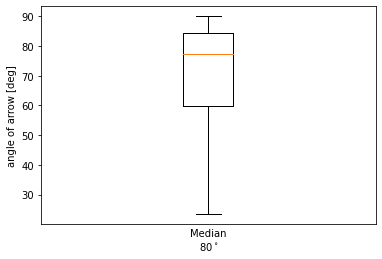

In [20]:
plt.boxplot(angles, showfliers=0)
plt.xticks([])
plt.xlabel(f"Median\n${np.int(np.round(np.percentile(angles, 50),-1))}^\circ$")
plt.ylabel(f"angle of arrow [deg]")
plt.savefig("displacement_arrows_angles_boxplot.png", dpi=400)
plt.savefig("displacement_arrows_angles_boxplot.pdf", dpi=400)

# mean speed of cell nucleus in middle of bridge

not yet worked out

mean= 0.257489964532663, median = 0.0 std = 1.2113286497962883 µm/min, sem: 0.021380087234647856


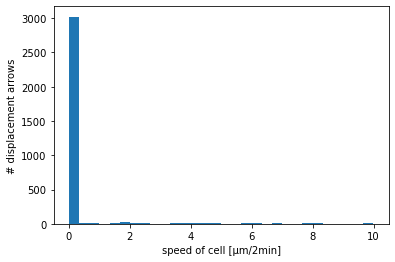

In [25]:
dif_results = np.array([])
for i in range(1):
    pd = pds[i]
    xmin, xmax = middle_ranges[i]
    nucl_x = abs(pd[(pd["x"]<xmax) & (pd["x"]>xmin)]["x_nucleus"])
    dif = np.abs(np.diff(nucl_x.values))[1:]
    #print(np.nanmean(np.arctan(div)*r2d))
    dif_results = np.concatenate((dif_results, dif), axis=None)

dif_results *= 2 # for µm/min instead of µm/2min
dif_results = dif_results[np.where(dif_results<10,True,False)]
plt.hist(dif_results, bins=30)
#plt.xlim([0, 20])
plt.ylabel(f"# displacement arrows")
plt.xlabel(f"speed of cell [µm/2min]")
plt.savefig("displacement_arrows_angles_pd1.png", dpi=400)
print(f"mean= {np.nanmean(dif_results)}, median = {np.nanmedian(dif_results)} std = {np.nanstd(dif_results)} µm/min, sem: {np.nanstd(dif_results)/(np.sum(~np.isnan(dif_results)))**0.5}")

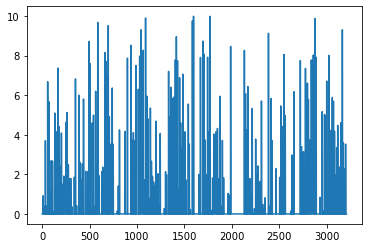

In [22]:
plt.plot(dif_results)